In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score
from sklearn.preprocessing import binarize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=400

In [3]:
data = pd.read_csv(r"D:\ExcelR_Assignments\Logistic_Regression\Datasets\bank-full.csv", sep=';', header=None, skiprows=1)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
column_names = ["Age", "Job", "Marital", "Education", "Default", "Balance", 
                "Housing", "Loan", "Contact", "Day", "Month", "Duration", 
                "Campaign", "Days", "Previous", "Outcome", "Y"]
data.columns = column_names
data

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Days,Previous,Outcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
data.describe()

,Age,Balance,Day,Duration,Campaign,Days,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Checking missing values

In [7]:
data.isna().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Days         0
Previous     0
Outcome      0
Y            0
dtype: int64

In [8]:
# No missing values are present

In [9]:
# Checking for duplicated records

In [10]:
data.duplicated().value_counts()

False    45211
dtype: int64

In [11]:
data.shape

(45211, 17)

In [12]:
data[data.duplicated()]

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Days,Previous,Outcome,Y


In [13]:
# No duplicated records available

In [14]:
# Checking for correlation 

In [15]:
# Replacing the "Yes" and "No" vales from data to "1" and "0"

In [16]:
colms_convrt = ['Default', 'Housing', 'Loan', 'Y']  

for col in colms_convrt:
    data[col] = data[col].map({'yes': 1, 'no': 0})

In [17]:
# Droping unwanted columns

In [18]:
data.drop(columns=['Contact', 'Outcome'], inplace=True)
data

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Day,Month,Duration,Campaign,Days,Previous,Y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,17,nov,508,4,-1,0,0


In [19]:
data.corr()

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,Days,Previous,Y
Age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
Default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
Balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
Housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
Loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
Day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
Duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
Campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
Days,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
Previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


<Axes: >

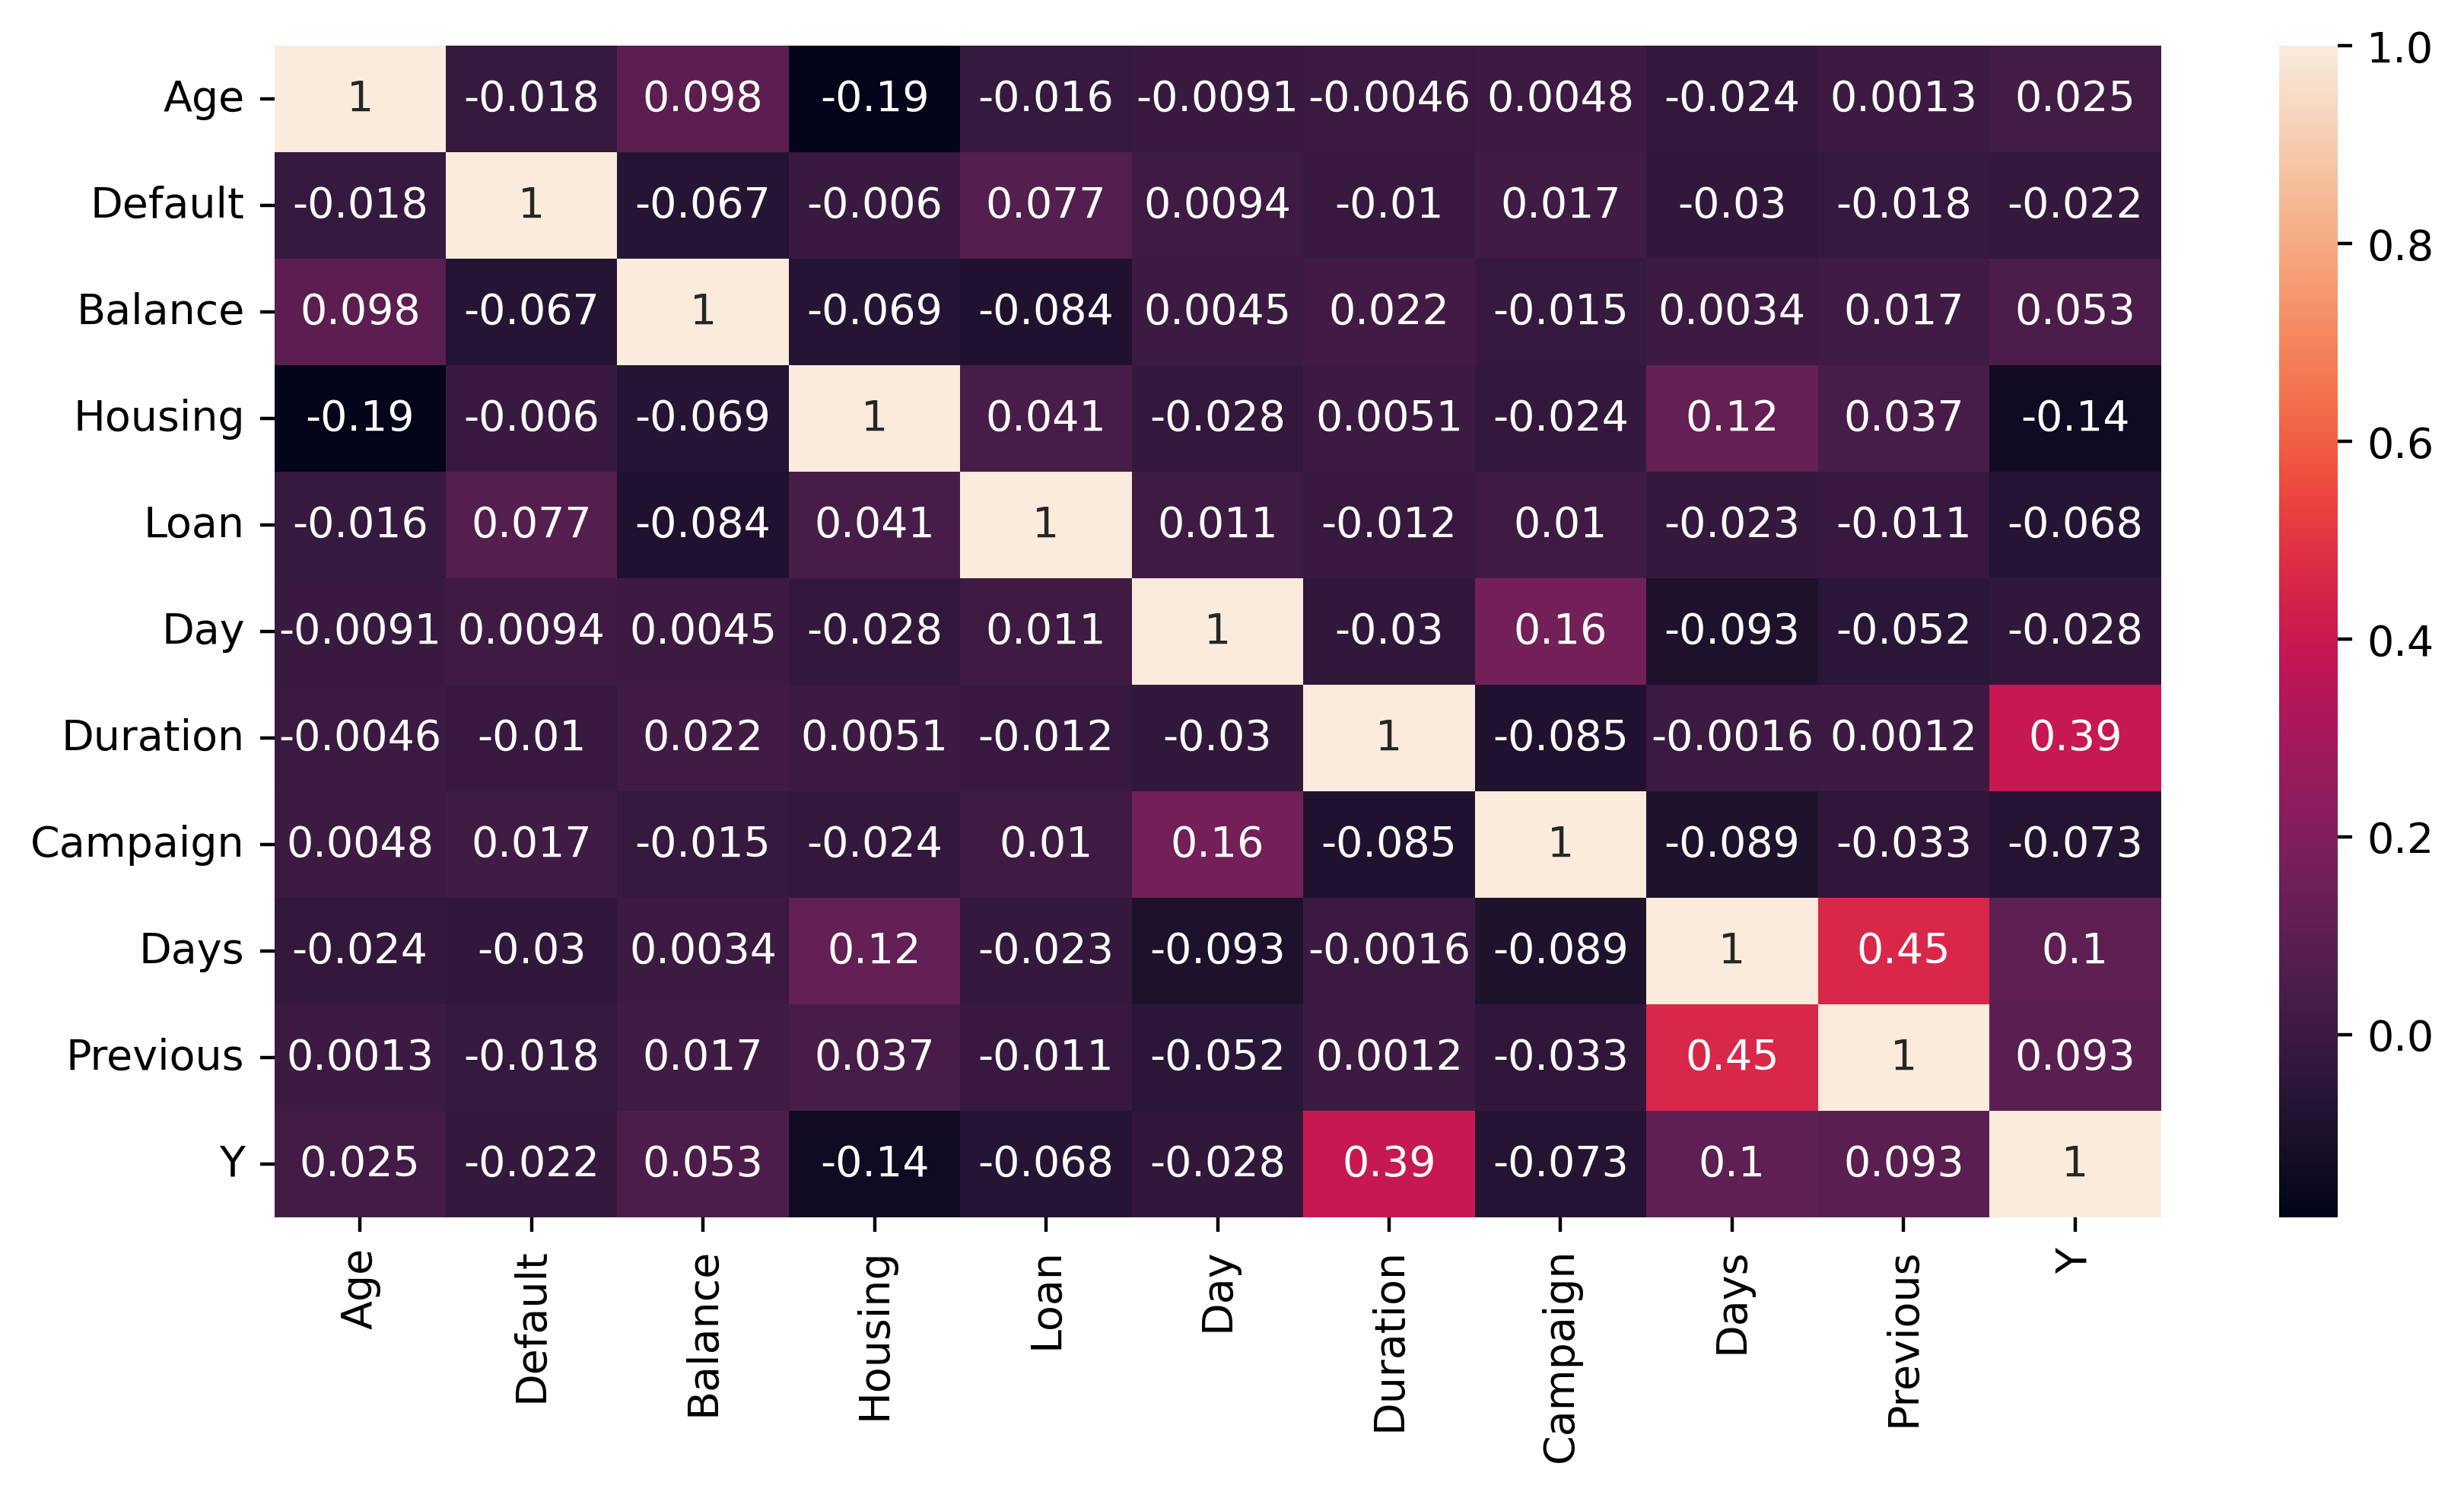

In [20]:
sns.heatmap(data.corr(), annot=True)

In [21]:
#sns.pairplot(data)

In [22]:
# Converting categorical columns to numerical using one hot encoding

In [23]:
data = pd.get_dummies(columns = ['Job', 'Marital', 'Education', 'Month'], data=data)
data

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,Days,Previous,...,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Counting how many % of Clients subscribed for Team Deposits

In [25]:
no_sub = len(data[data['Y']==0])
sub = len(data[data['Y']==1])

In [26]:
no_sub, sub

(39922, 5289)

In [27]:
(sub / (sub + no_sub))*100

11.698480458295547

In [28]:
# 11.70% of people from actual data have suscribed the team deposit

In [29]:
# Splitting data for model building

In [30]:
x = data.iloc[:, data.columns != 'Y']
y = data.iloc[:, data.columns == 'Y']

In [31]:
# Model Building

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
lg.coef_

array([[-2.48376862e-02, -2.11537629e-02,  1.35734432e-05,
        -7.14697784e-01, -1.97233176e-01, -1.45362875e-02,
         3.30611535e-03, -3.50471061e-01,  3.28887445e-03,
        -6.35598322e-02, -3.09302443e-02, -2.72593016e-01,
        -2.58660147e-02, -5.09250497e-03,  6.80434243e-03,
         1.71767464e-01, -1.34100782e-02, -9.17847684e-02,
         2.55535708e-02, -7.87693084e-02,  4.71884947e-03,
         2.16566592e-03,  2.04901599e-02, -1.78772000e-01,
        -1.49154202e-01, -7.33726647e-02, -2.90070396e-01,
         4.88407922e-02,  7.16622670e-03,  5.11377591e-02,
         3.55886053e-02,  3.12501809e-02, -2.23077747e-02,
        -1.24136439e-02, -7.71113762e-02, -7.29843994e-02,
         8.77642106e-02, -4.60085881e-01, -5.25756173e-02,
         1.04635436e-01,  7.96664587e-02]])

In [34]:
Y_pred = lg.predict(X_test)

In [35]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
# Calculating the confussion matrics and creating classification report

In [37]:
confusion_matrix(Y_test, Y_pred)

array([[7817,  135],
       [ 894,  197]], dtype=int64)

In [38]:
# Here TN = 7817, FP = 135, FN = 894, TP = 197
# i.e FP =Sucscribed but predicted as not sucscribed =135
#     FN = not sucscribed but predicted as sucscribed = 894
#     TP = sucscribed and predicted as sucscribed =197
#     Tn = not sucscribed and predicted as not sucscribed = 7817
# Here the FN > FP and i think FN is more concerning for our model to predict accurately.

In [39]:
# Visualizing the confusion_matrix

<Axes: >

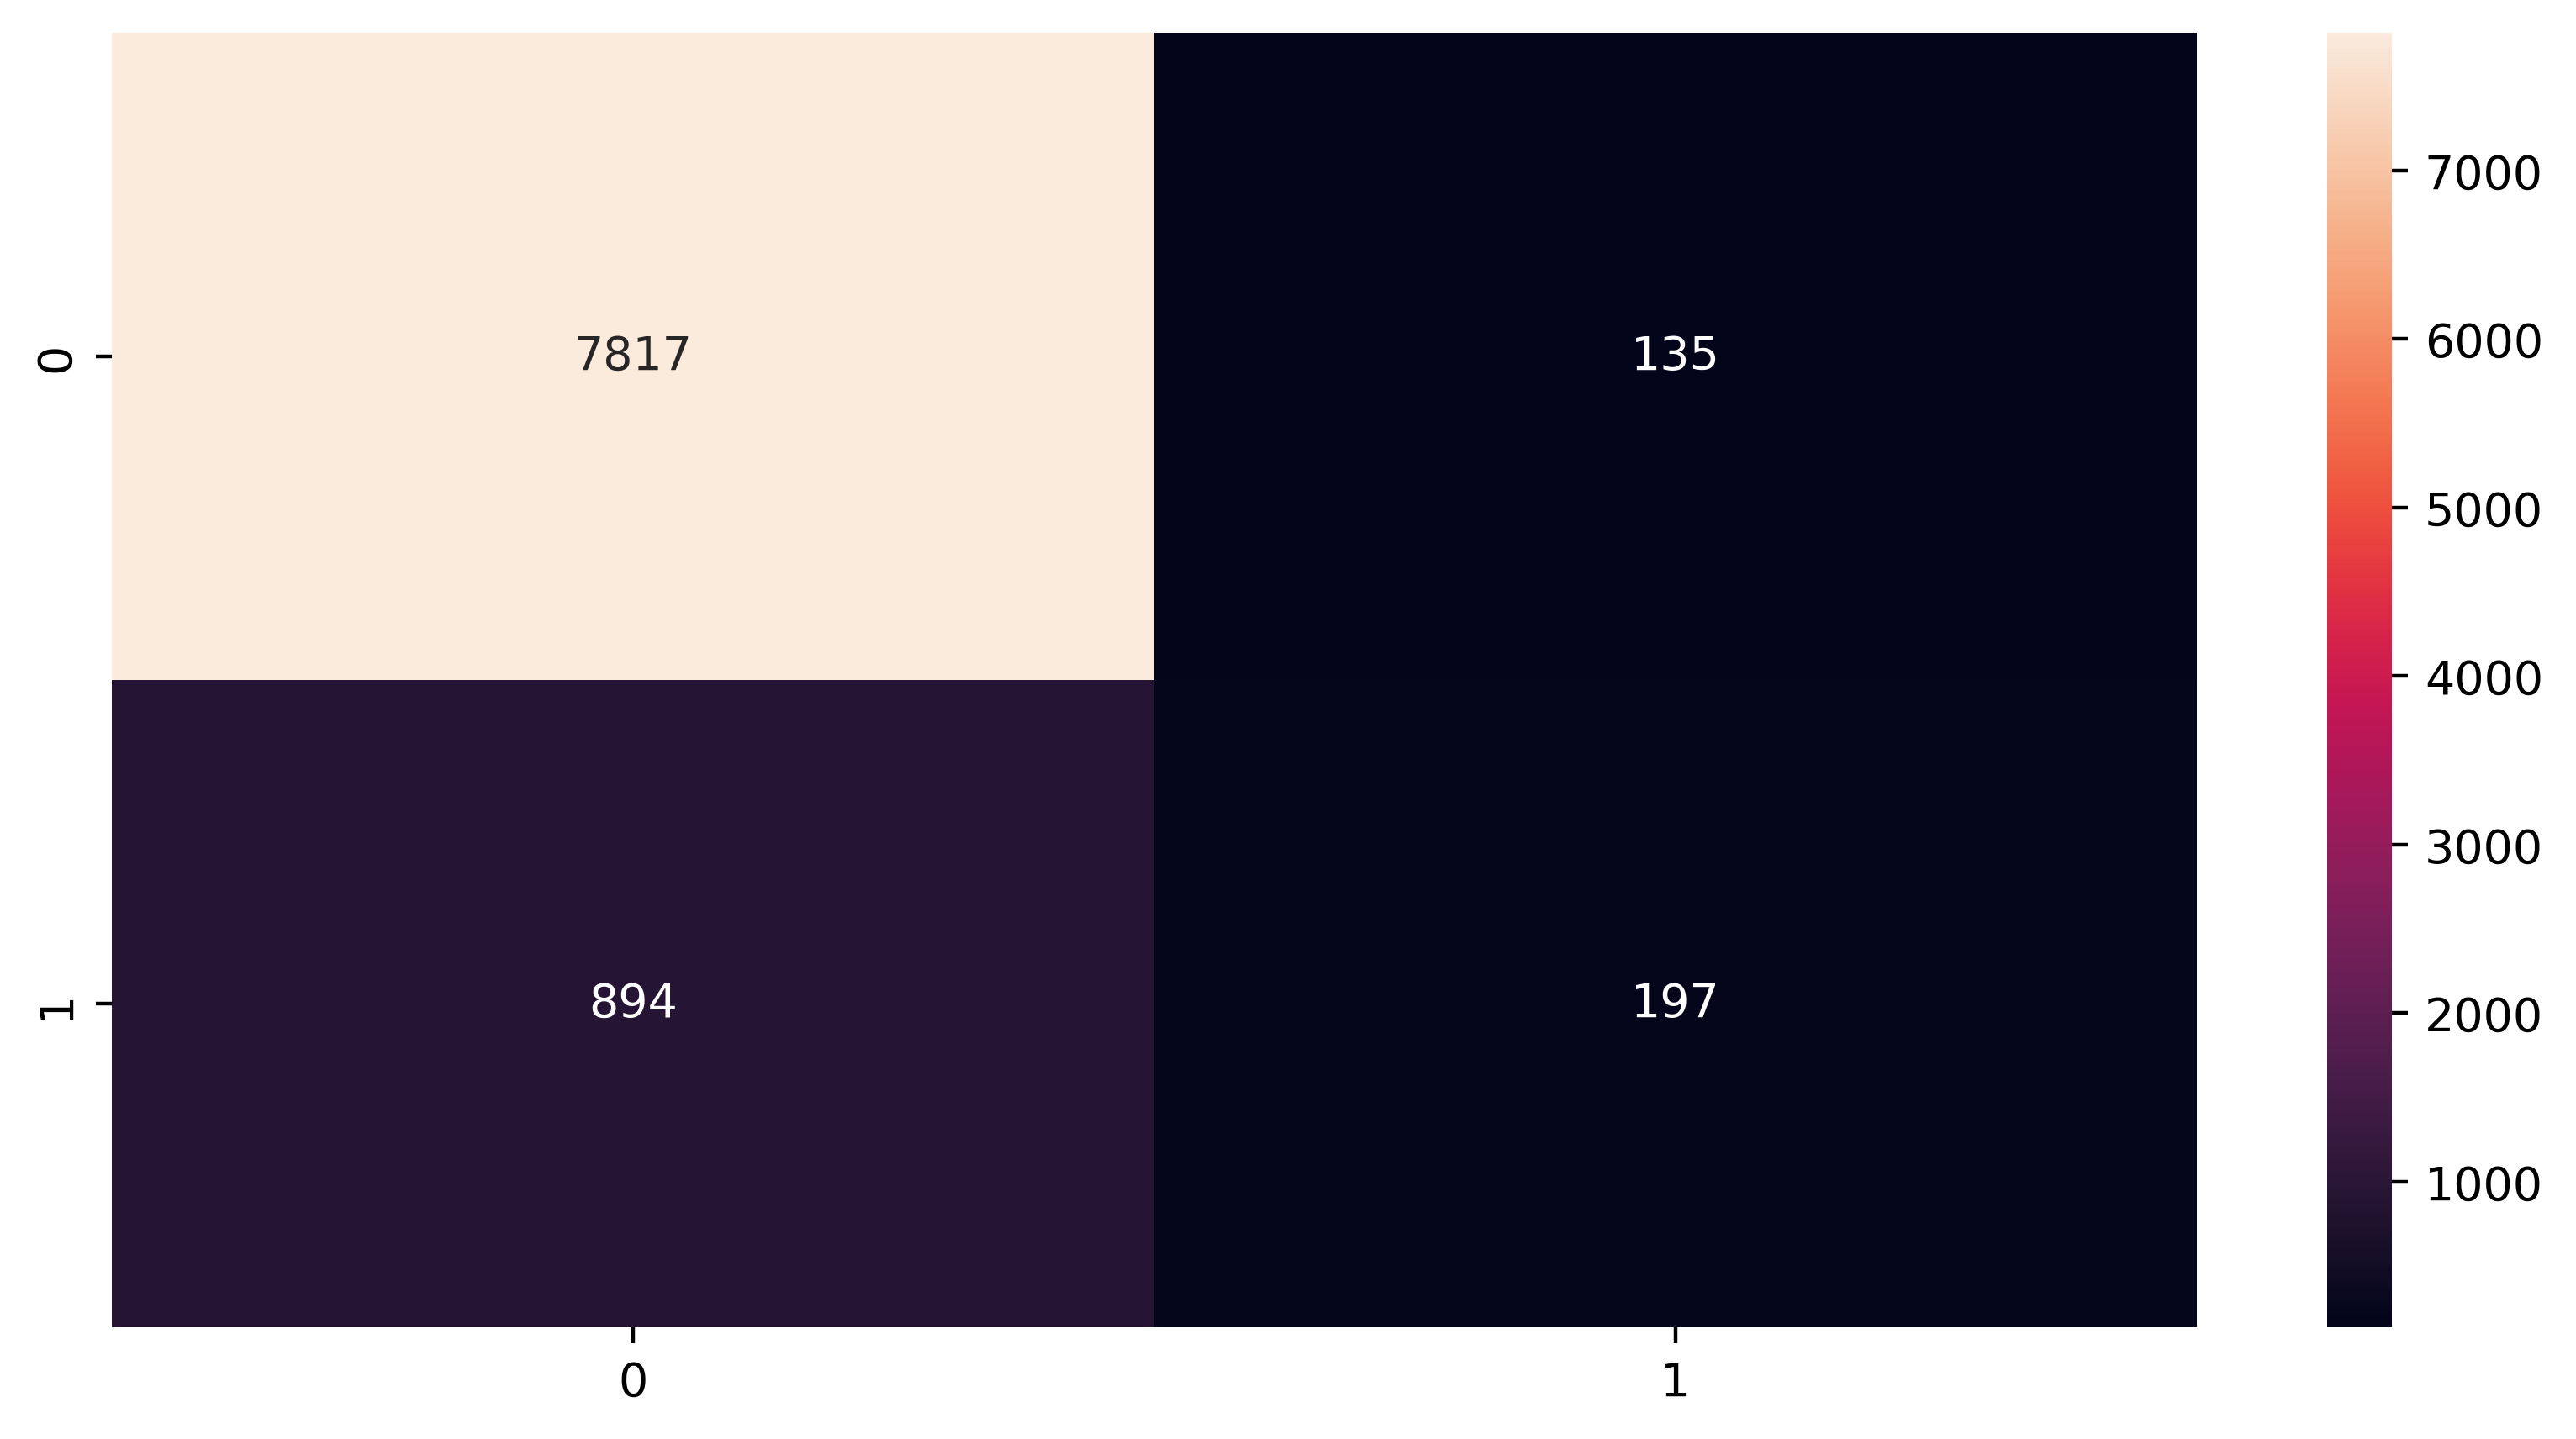

In [40]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='g')

In [41]:
# Checking for Classification report

In [42]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [43]:
# looking towards the classification_report of LogisticRegression model, it looks like 
# (FN) would likely be more concerning 
# Because they represent missed opportunities to identify potential clients who would subscribe to the term deposit.
# so if FN is Concerning then threshold_value < 0.5
# so i think we need to increase ability of model to predict positive class correctly (Recall).

In [44]:
# Threshold Selection 

In [45]:
X_test.head(3)

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,Days,Previous,...,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep
3776,40,0,580,1,0,16,192,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
9928,47,0,3644,0,0,9,83,2,-1,0,...,0,0,0,0,1,0,0,0,0,0
33409,25,0,538,1,0,20,226,1,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
proba = lg.predict_proba(X_test)[: , 1]
proba

array([0.04066428, 0.06978322, 0.17411583, ..., 0.04208901, 0.03441162,
       0.09449782])

In [47]:
# generating ROC and AUC curve

In [48]:
auc = roc_auc_score(Y_test, proba)
auc

0.8322647848594777

In [49]:
# The Area Under Curve is 83% which is good

In [50]:
roc_curve(Y_test, proba)

(array([0.00000000e+00, 0.00000000e+00, 3.77263581e-04, ...,
        9.90819920e-01, 9.90819920e-01, 1.00000000e+00]),
 array([0.00000000e+00, 9.16590284e-04, 9.16590284e-04, ...,
        9.99083410e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99954638e+00, 9.99546380e-01, 9.87868783e-01, ...,
        3.39943837e-04, 3.27960351e-04, 6.43901412e-09]))

In [51]:
fpr, tpr, threshold = roc_curve(Y_test, proba)

In [52]:
fpr

array([0.00000000e+00, 0.00000000e+00, 3.77263581e-04, ...,
       9.90819920e-01, 9.90819920e-01, 1.00000000e+00])

In [53]:
tpr

array([0.00000000e+00, 9.16590284e-04, 9.16590284e-04, ...,
       9.99083410e-01, 1.00000000e+00, 1.00000000e+00])

In [54]:
threshold

array([1.99954638e+00, 9.99546380e-01, 9.87868783e-01, ...,
       3.39943837e-04, 3.27960351e-04, 6.43901412e-09])

In [55]:
# Plotting lineplot between FPR and TPR values

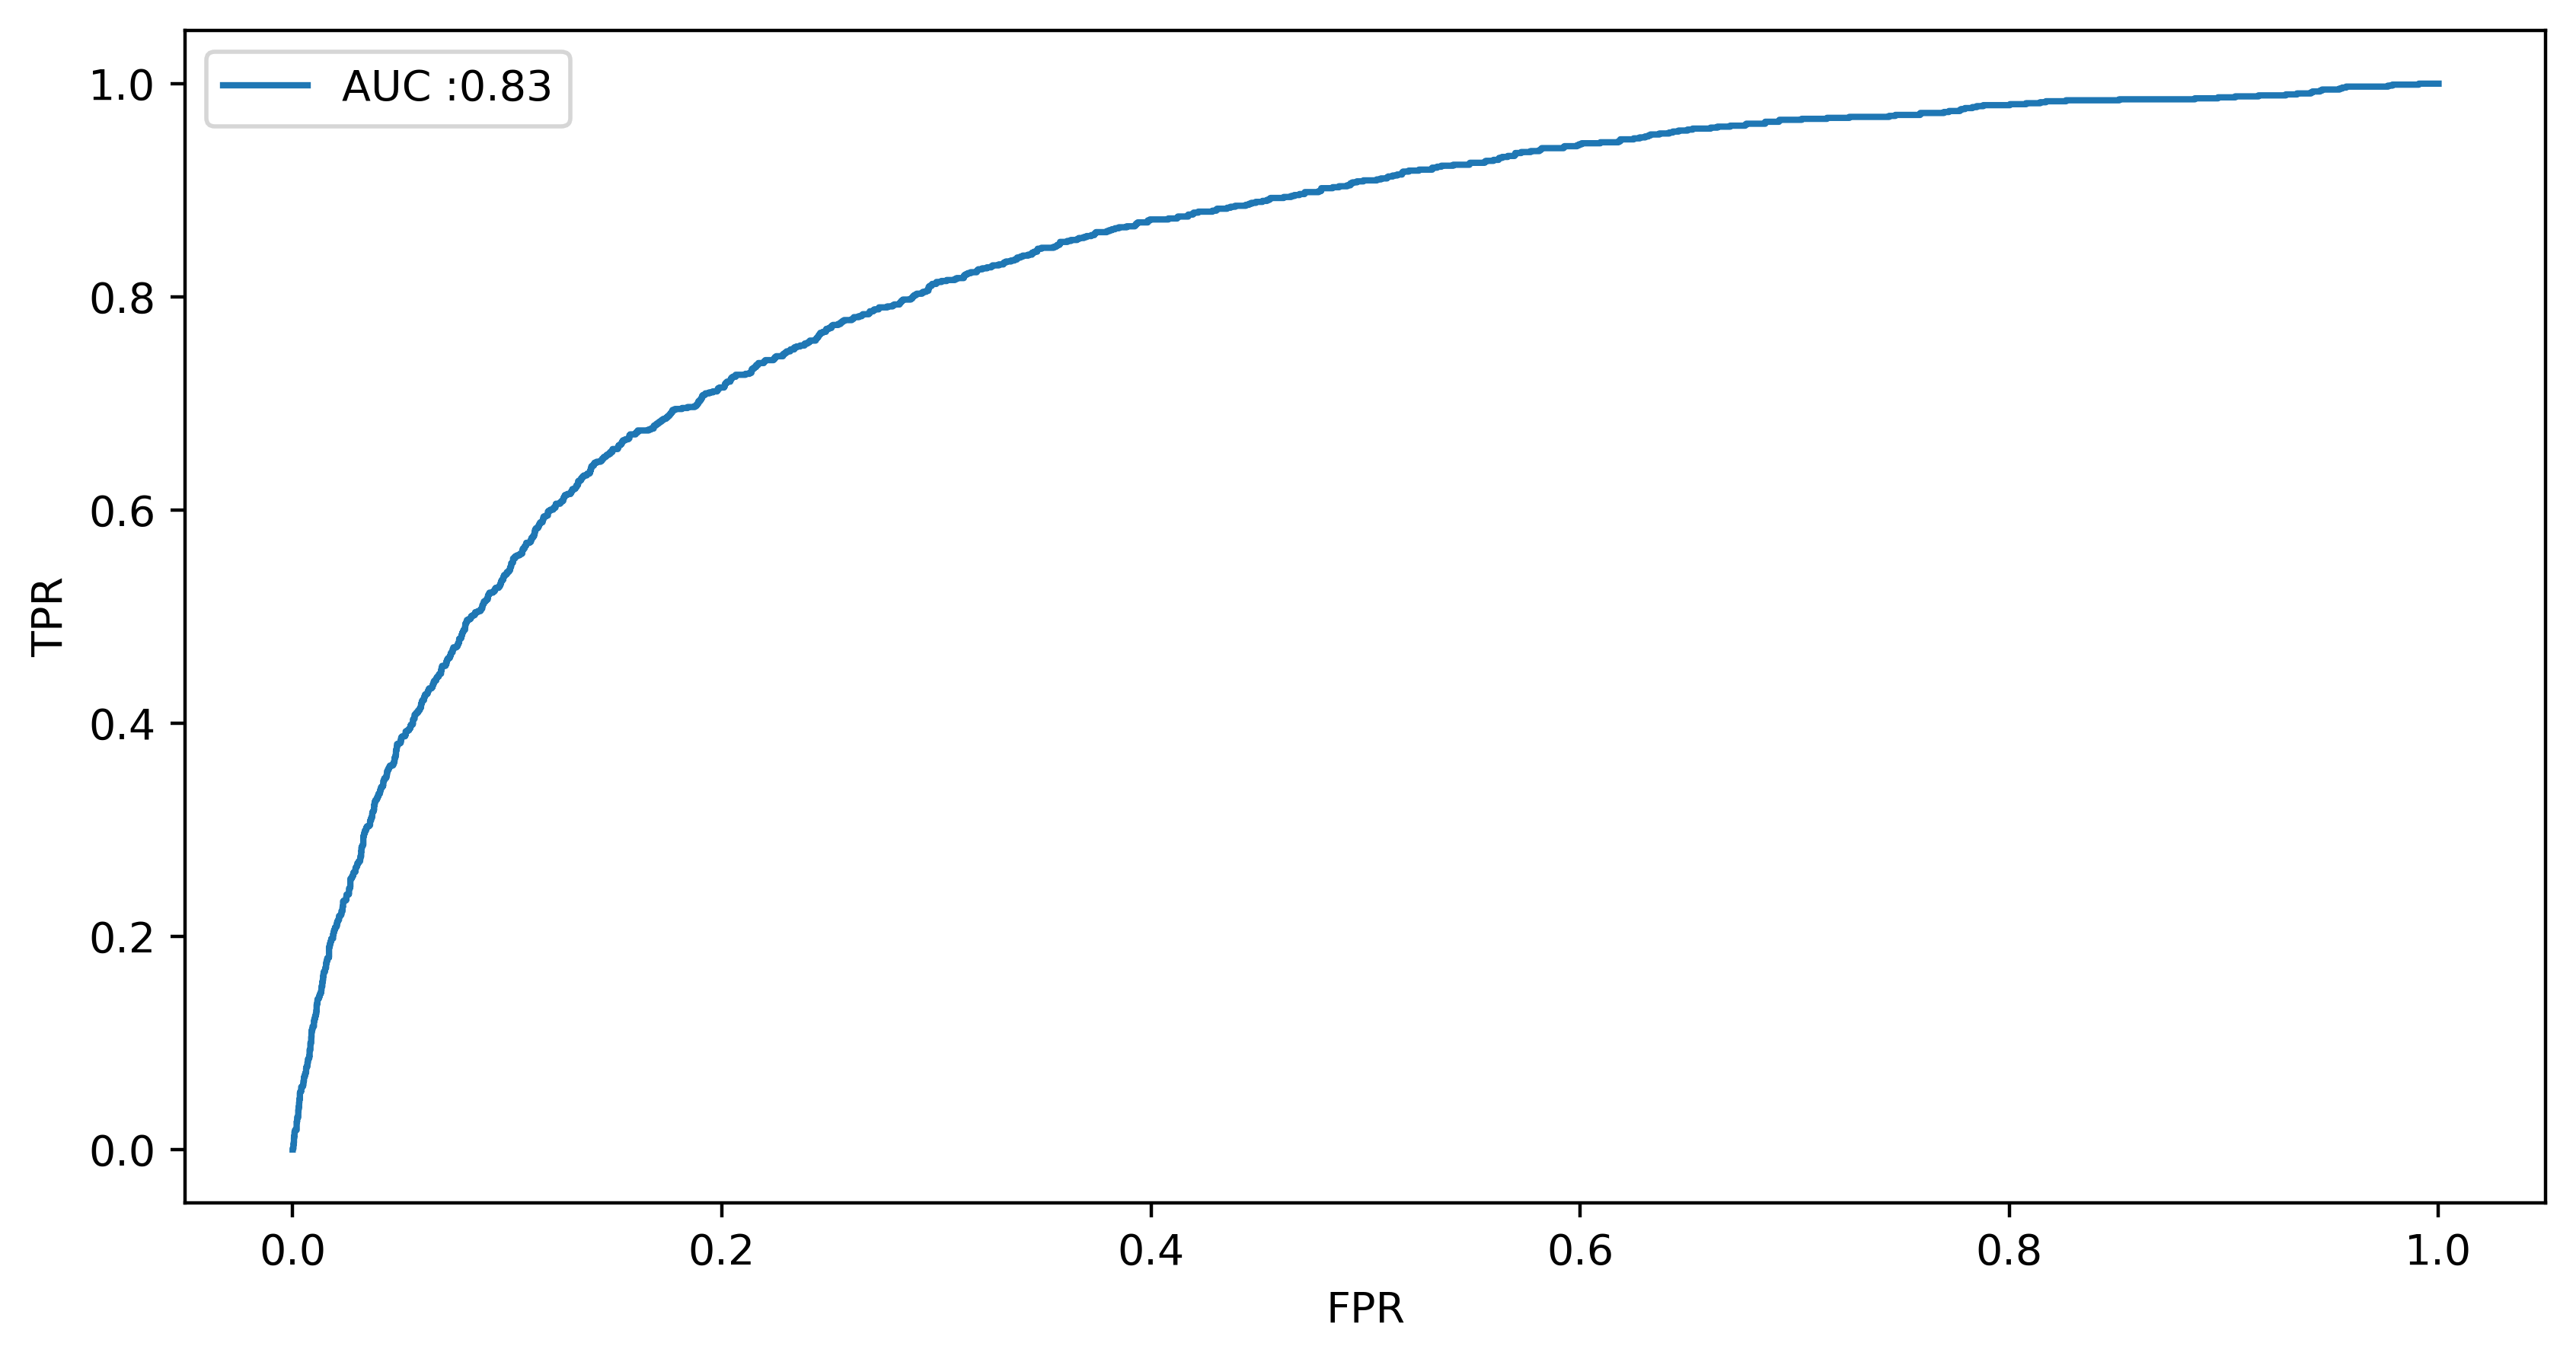

In [56]:
plt.plot(fpr, tpr, label = 'AUC :%0.2f'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [57]:
# Calculating accuracy of model by creating or using all the possible threshiold values
# We need to create lots of models by different different threshold values to get highets recall value of model

In [58]:
accuracy = []
for i in threshold:
    Y_pred = np.where(proba < i, 1, 0) # it will change the value of Y_pred where proba is less than the threshold value.
    accuracy.append(accuracy_score(Y_test, Y_pred))
accuracy

[0.1206458033838328,
 0.12053522061262856,
 0.1208669689262413,
 0.1204246378414243,
 0.12053522061262856,
 0.12031405507022006,
 0.1204246378414243,
 0.11987172398540308,
 0.11998230675660732,
 0.11976114121419883,
 0.11987172398540308,
 0.11942939290058609,
 0.11965055844299458,
 0.11942939290058609,
 0.12009288952781157,
 0.1192082273581776,
 0.11931881012938184,
 0.1192082273581776,
 0.11931881012938184,
 0.11887647904456486,
 0.11931881012938184,
 0.11854473073095212,
 0.11865531350215637,
 0.11843414795974787,
 0.11854473073095212,
 0.11832356518854363,
 0.11843414795974787,
 0.11799181687493089,
 0.11810239964613513,
 0.11777065133252239,
 0.11788123410372664,
 0.11777065133252239,
 0.11788123410372664,
 0.11721773747650116,
 0.11732832024770541,
 0.11721773747650116,
 0.1175494857901139,
 0.11743890301890965,
 0.1175494857901139,
 0.11710715470529691,
 0.11766006856131815,
 0.1175494857901139,
 0.11766006856131815,
 0.1175494857901139,
 0.11777065133252239,
 0.11732832024770541

In [59]:
# Creating a DataFrame containing all the threshold values with their accociated & updated accuracy.

In [60]:
threshold_selection = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' : accuracy
})
threshold_selection

,Threshold,Accuracy
0,1.999546e+00,0.120646
1,9.995464e-01,0.120535
2,9.878688e-01,0.120867
3,9.721537e-01,0.120425
4,9.700572e-01,0.120535
...,...,...
1510,1.793652e-03,0.860666
1511,1.767932e-03,0.860555
1512,3.399438e-04,0.871392
1513,3.279604e-04,0.871282


In [61]:
# Sorting the DataFrame into decsending order to get highest accuracy on top

In [62]:
threshold_selection.sort_values(by = 'Accuracy', ascending=False)
threshold_selection

,Threshold,Accuracy
0,1.999546e+00,0.120646
1,9.995464e-01,0.120535
2,9.878688e-01,0.120867
3,9.721537e-01,0.120425
4,9.700572e-01,0.120535
...,...,...
1510,1.793652e-03,0.860666
1511,1.767932e-03,0.860555
1512,3.399438e-04,0.871392
1513,3.279604e-04,0.871282


In [63]:
new_pred = binarize([proba], threshold = 6.439014e-09)[0]
new_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [64]:
print(classification_report(Y_test, new_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7952
           1       0.12      1.00      0.22      1091

    accuracy                           0.12      9043
   macro avg       0.06      0.50      0.11      9043
weighted avg       0.01      0.12      0.03      9043



In [65]:
# Here is new model with recall_value increased by 0.02 

In [66]:
# We can see that our model has classified  1 value(suscribed) with 100% recall value it means our model is not working good.
# I think it is due to the outliers datapoints which are causing the error to model to predict new values

In [67]:
# Model building by applying Standarization on data

In [68]:
columns_to_standardize = ['Age', 'Balance', 'Day', 'Duration', 'Days']
columns_to_keep = [col for col in data.columns if col not in columns_to_standardize]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[columns_to_standardize])
df_standardized = pd.DataFrame(standardized_data, columns=columns_to_standardize)
new_data_std = pd.concat([data[columns_to_keep], df_standardized], axis=1)
new_data_std


,Default,Housing,Loan,Campaign,Previous,Y,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,...,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Age,Balance,Day,Duration,Days
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1.606965,0.256419,-1.298476,0.011016,-0.411453
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.288529,-0.437895,-1.298476,-0.416127,-0.411453
2,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,-0.747384,-0.446762,-1.298476,-0.707361,-0.411453
3,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0.571051,0.047205,-1.298476,-0.645231,-0.411453
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,-0.747384,-0.447091,-1.298476,-0.233620,-0.411453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,3,0,1,0,0,0,0,...,0,0,1,0,0,0.947747,-0.176460,0.143418,2.791329,-0.411453
45207,0,0,0,2,0,1,0,0,0,0,...,0,0,1,0,0,2.831227,0.120447,0.143418,0.768224,-0.411453
45208,0,0,0,5,3,1,0,0,0,0,...,0,0,1,0,0,2.925401,1.429593,0.143418,3.373797,1.436189
45209,0,0,0,4,0,0,0,1,0,0,...,0,0,1,0,0,1.512791,-0.228024,0.143418,0.970146,-0.411453


In [69]:
x_std = new_data_std.iloc[:, data.columns != 'Y']
y_std = new_data_std.iloc[:, data.columns == 'Y']
x_std

,Default,Housing,Loan,Campaign,Previous,Y,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,...,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Age,Balance,Day,Duration,Days
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1.606965,0.256419,-1.298476,0.011016,-0.411453
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.288529,-0.437895,-1.298476,-0.416127,-0.411453
2,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,-0.747384,-0.446762,-1.298476,-0.707361,-0.411453
3,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0.571051,0.047205,-1.298476,-0.645231,-0.411453
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,-0.747384,-0.447091,-1.298476,-0.233620,-0.411453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,3,0,1,0,0,0,0,...,0,0,1,0,0,0.947747,-0.176460,0.143418,2.791329,-0.411453
45207,0,0,0,2,0,1,0,0,0,0,...,0,0,1,0,0,2.831227,0.120447,0.143418,0.768224,-0.411453
45208,0,0,0,5,3,1,0,0,0,0,...,0,0,1,0,0,2.925401,1.429593,0.143418,3.373797,1.436189
45209,0,0,0,4,0,0,0,1,0,0,...,0,0,1,0,0,1.512791,-0.228024,0.143418,0.970146,-0.411453


In [70]:
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(x,y, test_size=0.2, random_state=42)

In [71]:
lg2 = LogisticRegression()
lg2.fit(X_train_std, Y_train_std)
lg2.coef_

array([[-2.48376862e-02, -2.11537629e-02,  1.35734432e-05,
        -7.14697784e-01, -1.97233176e-01, -1.45362875e-02,
         3.30611535e-03, -3.50471061e-01,  3.28887445e-03,
        -6.35598322e-02, -3.09302443e-02, -2.72593016e-01,
        -2.58660147e-02, -5.09250497e-03,  6.80434243e-03,
         1.71767464e-01, -1.34100782e-02, -9.17847684e-02,
         2.55535708e-02, -7.87693084e-02,  4.71884947e-03,
         2.16566592e-03,  2.04901599e-02, -1.78772000e-01,
        -1.49154202e-01, -7.33726647e-02, -2.90070396e-01,
         4.88407922e-02,  7.16622670e-03,  5.11377591e-02,
         3.55886053e-02,  3.12501809e-02, -2.23077747e-02,
        -1.24136439e-02, -7.71113762e-02, -7.29843994e-02,
         8.77642106e-02, -4.60085881e-01, -5.25756173e-02,
         1.04635436e-01,  7.96664587e-02]])

In [72]:
Y_pred_std = lg.predict(X_test_std)
Y_pred_std

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
# Calculating Confusion Matrix & classification report

In [74]:
confusion_matrix(Y_test_std, Y_pred_std)

array([[7817,  135],
       [ 894,  197]], dtype=int64)

In [75]:
# Here TN = 4783, FP = 3169, FN = 372, TP = 719
# i.e FP =Sucscribed but predicted as not sucscribed = 3169
#     FN = not sucscribed but predicted as sucscribed = 372
#     TP = sucscribed and predicted as sucscribed =719
#     TN = not sucscribed and predicted as not sucscribed = 4783
# Here the FN < FP and i think FN is more concerning for our model to predict accurately.
# So we need to minimize the FN and increase TP

<Axes: >

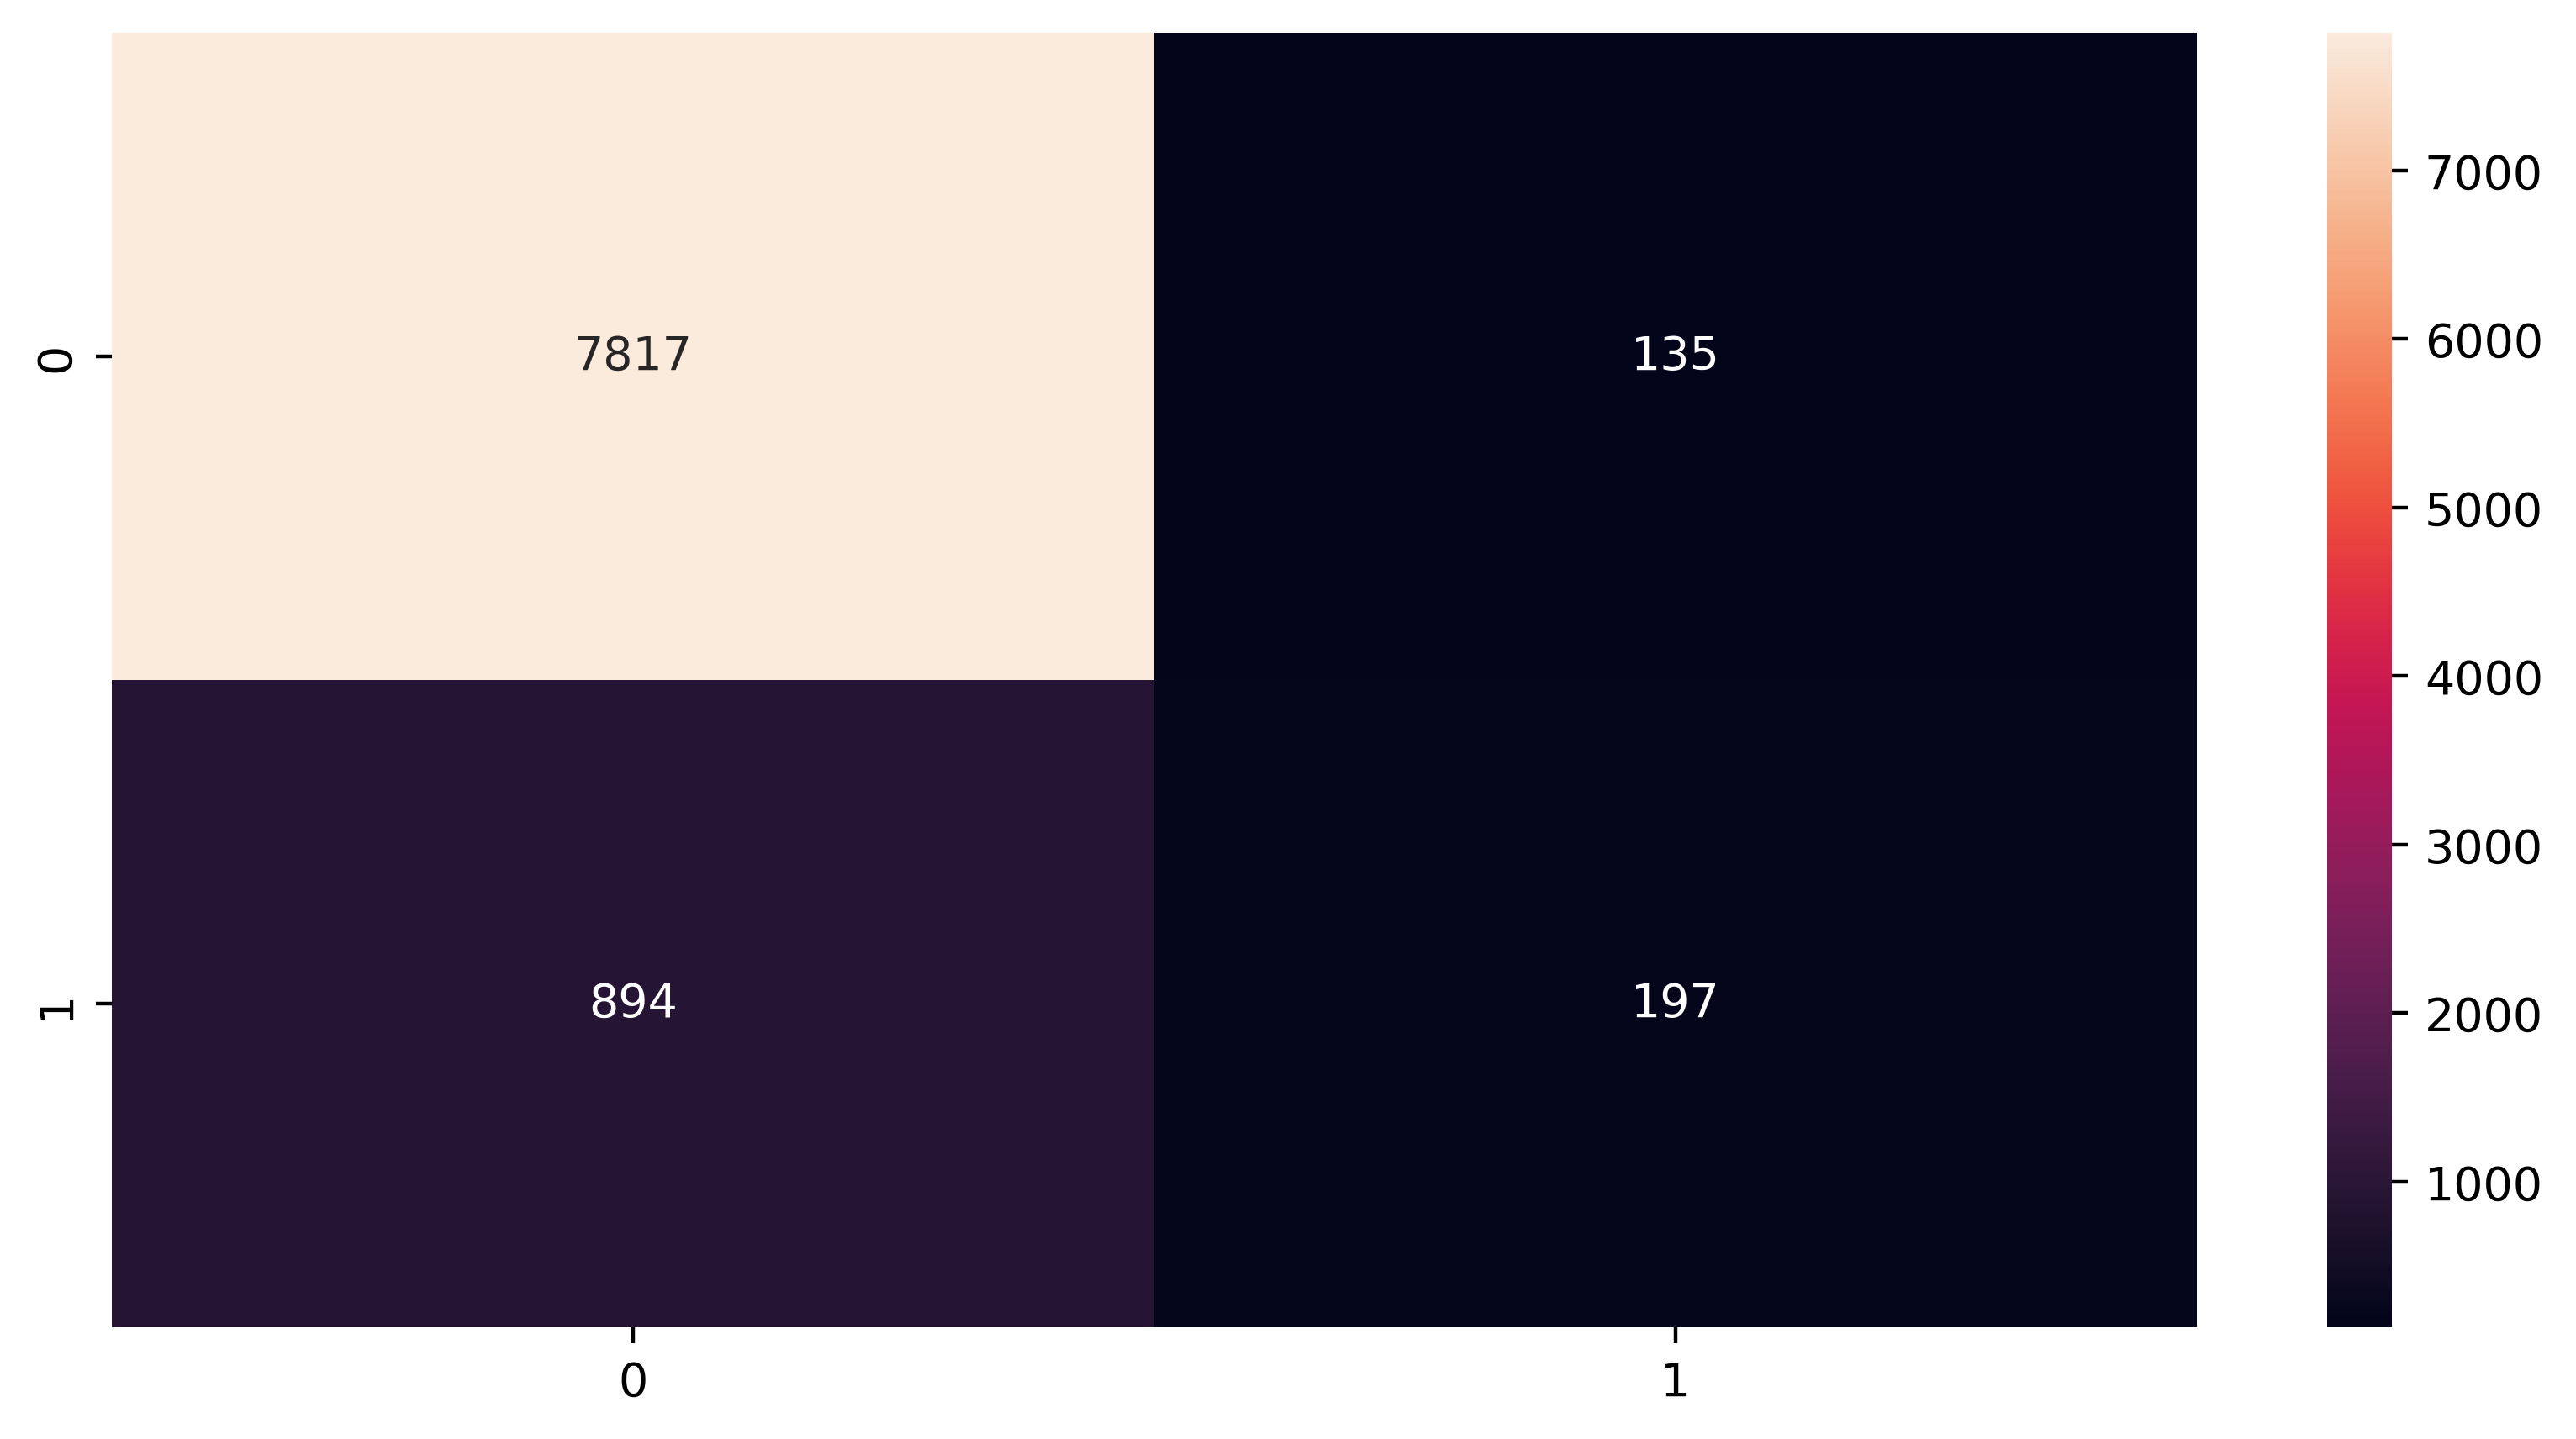

In [76]:
sns.heatmap(confusion_matrix(Y_test_std, Y_pred_std), annot=True, fmt='g')

In [77]:
print(classification_report(Y_test_std, Y_pred_std))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [78]:
# Here we need to increase recall value for predicting the 1(sucscribed) rate
# to increase recall --threshold value should be < 0.5.

In [79]:
# Calculating the ROC & AUC values

In [80]:
proba_std = lg2.predict_proba(X_test_std)[:,1]
proba_std

array([0.04066428, 0.06978322, 0.17411583, ..., 0.04208901, 0.03441162,
       0.09449782])

In [81]:
auc_std = roc_auc_score(Y_test_std, proba_std)
auc_std

0.8322647848594777

In [82]:
fpr_std, tpr_std, threshold_std = roc_curve(Y_test_std, proba_std)

In [83]:
fpr_std

array([0.00000000e+00, 0.00000000e+00, 3.77263581e-04, ...,
       9.90819920e-01, 9.90819920e-01, 1.00000000e+00])

In [84]:
tpr_std

array([0.00000000e+00, 9.16590284e-04, 9.16590284e-04, ...,
       9.99083410e-01, 1.00000000e+00, 1.00000000e+00])

In [85]:
threshold_std

array([1.99954638e+00, 9.99546380e-01, 9.87868783e-01, ...,
       3.39943837e-04, 3.27960351e-04, 6.43901412e-09])

In [86]:
# Plotting lineplot between FPR_std and TPR_std

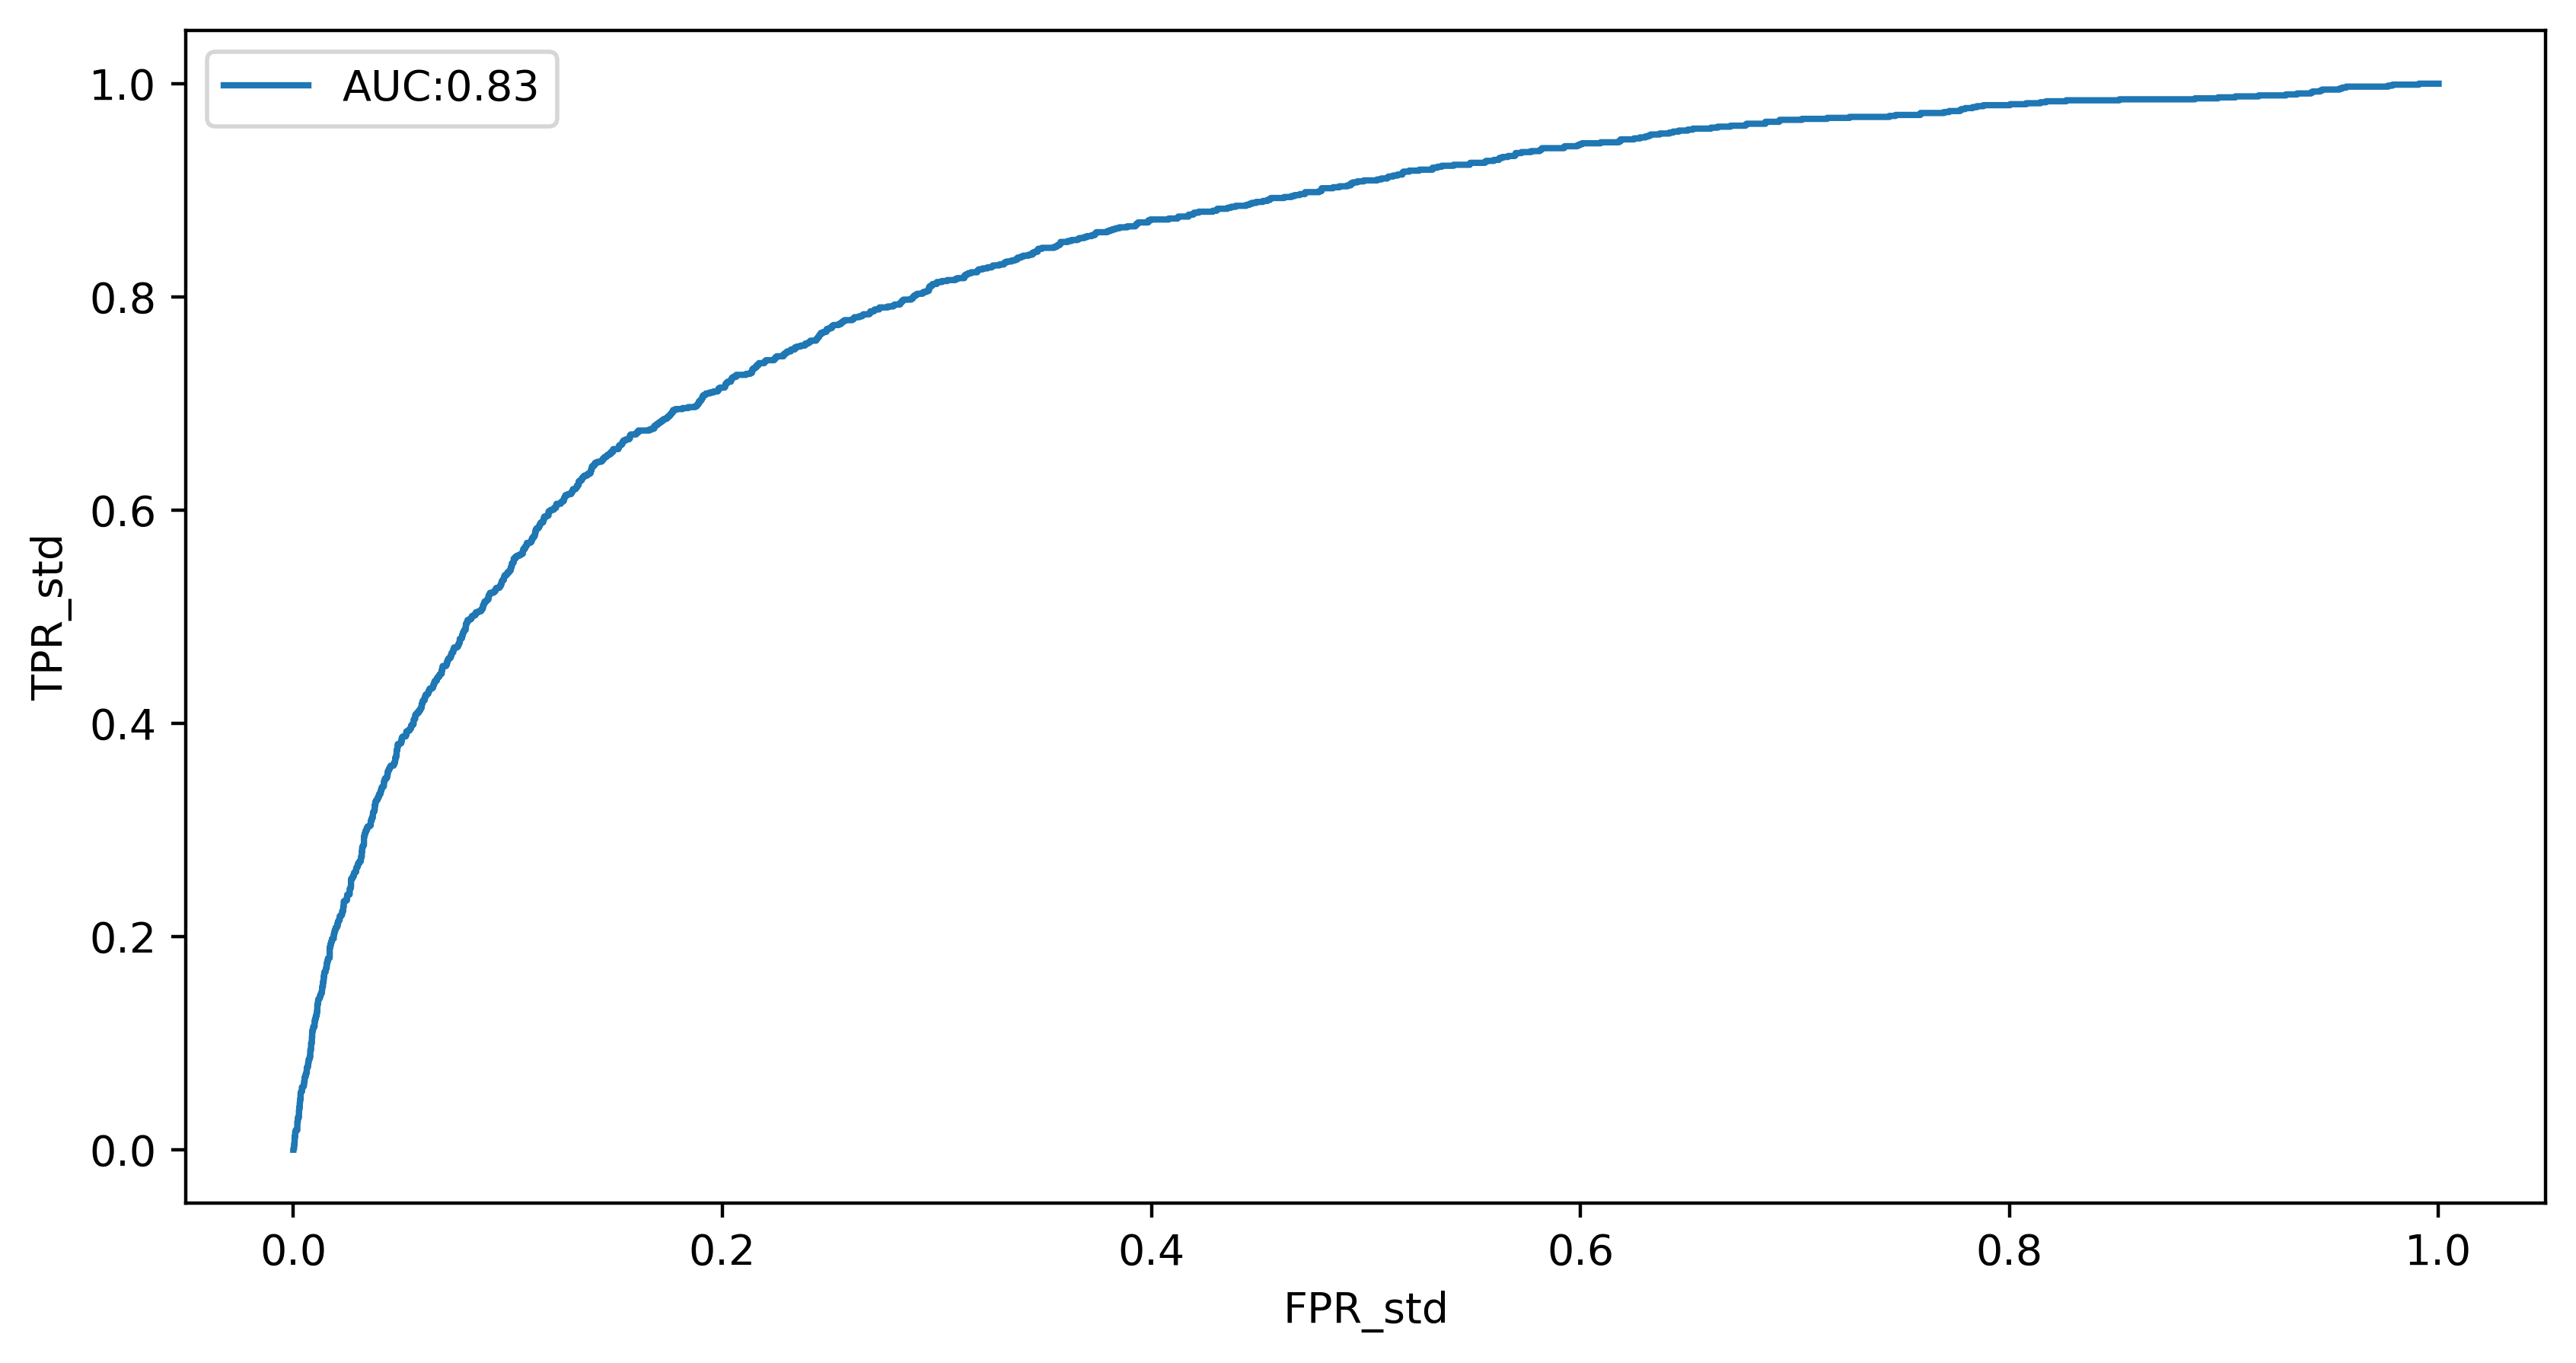

In [87]:
plt.plot(fpr_std, tpr_std, label = "AUC:%0.2f"%auc)
plt.xlabel('FPR_std')
plt.ylabel('TPR_std')
plt.legend()

In [88]:
# Here the AUC is same for both the models

In [89]:
# Calculating the models peroformance by creating models with different different threshold_std values.

In [90]:
accuracy_std = []
for i in threshold_std:
    Y_pred_std = np.where(proba_std > i, 1, 0)
    accuracy_std.append(accuracy_score(Y_test_std, Y_pred_std))
accuracy_std

[0.8793541966161672,
 0.8793541966161672,
 0.879243613844963,
 0.8794647793873714,
 0.8795753621585757,
 0.8795753621585757,
 0.8796859449297799,
 0.8800176932433926,
 0.880128276014597,
 0.880128276014597,
 0.8802388587858012,
 0.8804600243282097,
 0.8804600243282097,
 0.8804600243282097,
 0.8800176932433926,
 0.8806811898706182,
 0.8807917726418224,
 0.8806811898706182,
 0.8807917726418224,
 0.8810129381842309,
 0.8807917726418224,
 0.8813446864978436,
 0.8814552692690479,
 0.8814552692690479,
 0.8815658520402522,
 0.8815658520402522,
 0.8816764348114564,
 0.8818976003538649,
 0.8820081831250691,
 0.8821187658962734,
 0.8822293486674776,
 0.8821187658962734,
 0.8822293486674776,
 0.8826716797522945,
 0.8827822625234988,
 0.8826716797522945,
 0.8825610969810903,
 0.8824505142098861,
 0.8825610969810903,
 0.8827822625234988,
 0.8824505142098861,
 0.8823399314386818,
 0.8824505142098861,
 0.8823399314386818,
 0.8823399314386818,
 0.8825610969810903,
 0.8825610969810903,
 0.8827822625234

In [91]:
# Threshold Selection for model 2

In [92]:
threshold_selection_std = pd.DataFrame({
    'Threshold_std' : threshold_std,
    'Accuracy_std' : accuracy_std
})
threshold_selection_std.sort_values(by = 'Accuracy_std', ascending=False)
threshold_selection_std

,Threshold_std,Accuracy_std
0,1.999546e+00,0.879354
1,9.995464e-01,0.879354
2,9.878688e-01,0.879244
3,9.721537e-01,0.879465
4,9.700572e-01,0.879575
...,...,...
1510,1.793652e-03,0.139445
1511,1.767932e-03,0.139334
1512,3.399438e-04,0.128718
1513,3.279604e-04,0.128608


In [93]:
new_pred_std = binarize([proba_std], threshold = 9.995464e-01)[0]
new_pred_std

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
print(np.unique(new_pred_std))

[0.]


In [95]:
print(classification_report(Y_test_std, new_pred_std))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



In [101]:
# models accuracy is 88% but i think model is not working properly 
# here model is only predicting the 0(not Sucscribed ) values only and thats cannnot be possible

In [102]:
# Lets build another model with another data transformation method

In [104]:
columns_to_normalize = ['Age', 'Balance', 'Day', 'Duration', 'Days']
columns_to_keep = [col for col in data.columns if col not in columns_to_standardize]
scaler2 = MinMaxScaler()
normalized_data = scaler2.fit_transform(data[columns_to_normalize])
df_normalize = pd.DataFrame(normalized_data, columns=columns_to_normalize)
new_data_nrm = pd.concat([data[columns_to_keep], df_normalize], axis=1)
new_data_nrm


,Default,Housing,Loan,Campaign,Previous,Y,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,...,Month_mar,Month_may,Month_nov,Month_oct,Month_sep,Age,Balance,Day,Duration,Days
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.519481,0.092259,0.133333,0.053070,0.000000
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.337662,0.073067,0.133333,0.030704,0.000000
2,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0.194805,0.072822,0.133333,0.015453,0.000000
3,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0.376623,0.086476,0.133333,0.018707,0.000000
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.194805,0.072812,0.133333,0.040260,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,3,0,1,0,0,0,0,...,0,0,1,0,0,0.428571,0.080293,0.533333,0.198658,0.000000
45207,0,0,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0.688312,0.088501,0.533333,0.092721,0.000000
45208,0,0,0,5,3,1,0,0,0,0,...,0,0,1,0,0,0.701299,0.124689,0.533333,0.229158,0.212156
45209,0,0,0,4,0,0,0,1,0,0,...,0,0,1,0,0,0.506494,0.078868,0.533333,0.103294,0.000000


In [ ]:
x_nrm = new_data_std.iloc[:, data.columns != 'Y']
y_nrm = new_data_std.iloc[:, data.columns == 'Y']
x_nmr